### Data preprocessing

#### Import the dataset

In [66]:
import numpy as np
import pandas as pd
from pandas import read_csv

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv'

data = read_csv(url)

data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


#### Observe the dataset

In [67]:
print(f'The data shape is {data.shape}')
print('--------------------------------')
print(f'The numbers of NAN value in the dataset are \n{data.isnull().sum()}')
print('--------------------------------')
print(data.describe())

The data shape is (10129, 19)
--------------------------------
The numbers of NAN value in the dataset are 
Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64
--------------------------------
            S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000   

In [68]:
for ind in range(data.shape[1]):
    if data.dtypes[ind] != 'int64' and data.dtypes[ind] != 'float64':
        col_name= data.dtypes.index[ind]
        print(col_name)
        print(data[col_name].value_counts())
        print('--------------------------------------------------------------')

Date
2017/12/23    2779
2017/12/25    1716
2017/12/22    1462
2017/12/24    1064
2017/12/26    1063
2018/01/11    1048
2018/01/10     997
Name: Date, dtype: int64
--------------------------------------------------------------
Time
10:49:41    1
21:43:16    1
21:39:42    1
21:40:13    1
21:40:43    1
           ..
16:31:37    1
16:32:07    1
16:32:38    1
16:33:09    1
09:00:09    1
Name: Time, Length: 10129, dtype: int64
--------------------------------------------------------------


### Biuld the model

In [69]:
X = data.iloc[:,2:-1]
y = data.iloc[:, -1].astype('int')

#### Build the machine learnig model

In [70]:
from deap import base
from deap import creator
from deap import tools
import random

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# fill in the with random floats for each type of hyper parameter
toolbox.register("h1", random.uniform, 10, 50)
toolbox.register("h2", random.uniform, 5, 20)
toolbox.register("h3", random.uniform, 20, 50)

toolbox.register("IndividualCreator",tools.initCycle,creator.Individual,
                 (toolbox.h1,toolbox.h2,toolbox.h3),n=1)

c:\Users\mljgs\anaconda3\envs\Jerry\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\Users\mljgs\anaconda3\envs\Jerry\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [71]:
def getParams(individual):
    n_est = round(individual[0])
    max_depth = round(individual[1])
    min_samples_leaf = round(individual[2])
    return n_est, max_depth, min_samples_leaf

In [72]:
from sklearn import model_selection, ensemble

kfold = model_selection.KFold(n_splits=2, random_state=42, shuffle=True)

def getAccuracy(individual):
    n_estimators, max_depth, min_samples_leaf = getParams(individual)
    classifier = ensemble.RandomForestClassifier(random_state=42,
                                         n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf
                                         )

    cv_results = model_selection.cross_val_score(classifier,
                                                 X,
                                                 y,
                                                 cv=kfold,
                                                 scoring='accuracy', 
                                                 error_score="raise")
    return cv_results.mean()

In [73]:
# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, 
                 toolbox.IndividualCreator)
# fitness calculation
def classificationAccuracy(individual):
    return getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxUniform, indpb=0.8)
toolbox.register("mutate", tools.mutUniformInt, low=[10, 5, 20], up=[50, 20, 50], indpb=0.1)


In [74]:
from deap import algorithms

# Genetic Algorithm constants:
POPULATION_SIZE = 10
P_CROSSOVER = 0.8  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 10
HALL_OF_FAME_SIZE = 3

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population,
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# print best solution found:
print("- Best solution is: ")
print("params = ", hof.items[0])
print("Accuracy = %1.5f" % hof.items[0].fitness.values[0])

gen	nevals	max     	avg     
0  	10    	0.993385	0.991667
1  	9     	0.993385	0.992862
2  	8     	0.993978	0.993158
3  	8     	0.993978	0.993385
4  	7     	0.993978	0.993533
5  	10    	0.993978	0.993652
6  	8     	0.993978	0.9938  
7  	8     	0.993978	0.993919
8  	6     	0.993978	0.993978
9  	10    	0.993978	0.993978
10 	10    	0.993978	0.993978
- Best solution is: 
params =  [20.349306078308764, 14.285082336482079, 20.025563606082613]
Accuracy = 0.99398


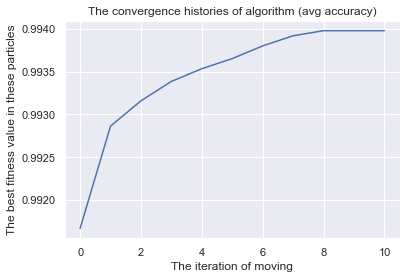

In [75]:
import matplotlib.pyplot as plt

plt.plot([con_row['avg'] for con_row in logbook])
plt.title('The convergence histories of algorithm (avg accuracy)')
plt.xlabel('The iteration of moving')
plt.ylabel('The best fitness value in these particles')
plt.show()

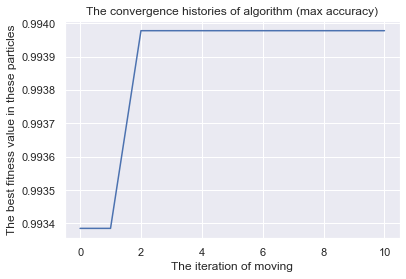

In [77]:
plt.plot([con_row['max'] for con_row in logbook])
plt.title('The convergence histories of algorithm (max accuracy)')
plt.xlabel('The iteration of moving')
plt.ylabel('The best fitness value in these particles')
plt.show()

gen	nevals	max     	avg     
0  	10    	0.992497	0.990878
1  	4     	0.99299 	0.992132
2  	10    	0.99299 	0.992674
3  	10    	0.99299 	0.992882
4  	10    	0.99299 	0.992961
5  	10    	0.99299 	0.99299 
6  	10    	0.99299 	0.99299 
7  	7     	0.99299 	0.99299 
8  	6     	0.99299 	0.99299 
9  	10    	0.99299 	0.992951
10 	10    	0.99299 	0.99299 
gen	nevals	max     	avg     
0  	10    	0.993484	0.990957
1  	10    	0.993484	0.992447
2  	8     	0.993484	0.993208
3  	9     	0.993484	0.993218
4  	8     	0.993484	0.993484
5  	7     	0.993484	0.993484
6  	10    	0.993484	0.993484
7  	9     	0.993484	0.993484
8  	8     	0.993484	0.993484
9  	8     	0.993484	0.993484
10 	10    	0.993484	0.993484
gen	nevals	max     	avg     
0  	10    	0.993682	0.991184
1  	10    	0.993682	0.992477
2  	10    	0.993682	0.99299 
3  	8     	0.993682	0.993326
4  	8     	0.993682	0.993632
5  	8     	0.993682	0.993376
6  	9     	0.993682	0.993682
7  	8     	0.993682	0.993682
8  	8     	0.993682	0.993682
9  	9     	0.9

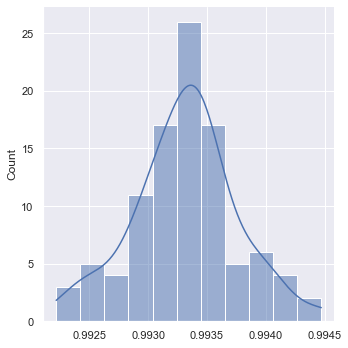

In [63]:
import seaborn as sns
GA_record = []

for _ in range(100):

    # Genetic Algorithm constants:
    POPULATION_SIZE = 10
    P_CROSSOVER = 0.8  # probability for crossover
    P_MUTATION = 0.1   # probability for mutating an individual
    MAX_GENERATIONS = 10
    HALL_OF_FAME_SIZE = 3

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population,
                                            toolbox,
                                            cxpb=P_CROSSOVER,
                                            mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS,
                                            stats=stats,
                                            halloffame=hof,
                                            verbose=True)
    GA_record.append(logbook[-1]['avg'])


sns.set()
sns.displot(GA_record, kde=True)

### Grid search to compare the GA result

In [78]:
result_rec = []
iter_num = 25

for n_estimators in np.linspace(10, 50, num=iter_num):
    for max_depth in np.linspace(5, 20, num=iter_num):
        for min_samples_leaf in np.linspace(20, 50, num=iter_num):
            classifier = ensemble.RandomForestClassifier(random_state=42,
                                                    n_estimators=round(n_estimators),
                                                    max_depth=round(max_depth),
                                                    min_samples_leaf=round(min_samples_leaf)
                                                    )

            cv_results = model_selection.cross_val_score(classifier,
                                                            X,
                                                            y,
                                                            cv=kfold,
                                                            scoring='accuracy', 
                                                            error_score="raise")

            result_rec.append(cv_results.mean())

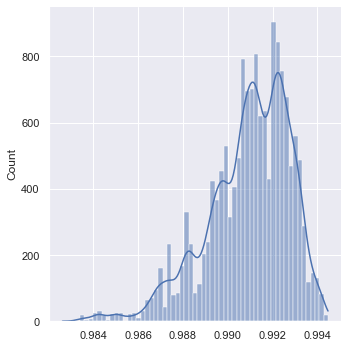

In [ ]:
import seaborn as sns

sns.set()
sns.displot(result_rec, kde=True)